## Group 6 DBDA Bond Liquidity Prediction and it’s analysis over time series

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set('notebook')
import datetime
import csv

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

* Install PyMongo Package

In [5]:
# !pip install pymongo

* Import Data From Mongo

In [18]:
import pymongo

from pymongo import MongoClient
client = MongoClient()
db = client.project
collection_dataset = db.dataset
collection_ML_Bond_metadata=db.ML_Bond_metadata
collection_avgvol=db.avgvol

data = pd.DataFrame(collection_dataset.find())
df = pd.DataFrame(collection_ML_Bond_metadata.find())

In [19]:
del data['_id']
del df['_id']

In [20]:
data.head()

,isin,time,price,side,volume,timeofday,date
0,isin10033,Mon 16May16 02:51:27.000 pm,117.36361835280748,S,730000,Afternoon,16May2016
1,isin10033,Mon 16May16 03:45:52.000 pm,115.71532940722403,B,730000,Afternoon,16May2016
2,isin10033,Wed 6Apr16 08:24:07.000 am,115.29645038674539,B,5000,Morning,6Apr2016
3,isin10033,Wed 6Apr16 08:24:07.000 am,115.29645038674539,B,5000,Morning,6Apr2016
4,isin10033,Wed 6Apr16 08:25:00.000 am,115.55824977454455,S,5000,Morning,6Apr2016


* Data Cleaning

In [23]:
data["price"] = data.price.astype('float64')
data["volume"] = data.volume.astype('int64')
# data.info()

In [24]:
type(df['couponFrequency'])
df['couponFrequency']=pd.to_numeric(df['couponFrequency'], errors='coerce').astype('float64')

In [25]:
df["coupon"] = df.coupon.astype('float64')
df["amtIssued"] = df.amtIssued.astype('int64')
df["amtOutstanding"] = df.amtOutstanding.astype('int64')

In [26]:
df.head()

,isin,issuer,issue date,Market,amtIssued,amtOutstanding,collateralType,coupon,couponFrequency,couponType,...,maturityType,securityType,paymentRank,144aFlag,ratingAgency1Rating,ratingAgency1Watch,ratingAgency1EffectiveDate,ratingAgency2Rating,ratingAgency2Watch,ratingAgency2EffectiveDate
0,isin0,issuer490,8Dec2011,Market2,183260000,183260000,collateralType19,10.000,2.0,couponType1,...,maturityType5,securityType3,paymentRank3,flag0,rating0,watch0,NA,rating0,watch0,NA
1,isin1,issuer1193,10-Sep-10,Market2,261800000,198970000,collateralType26,5.500,2.0,couponType1,...,maturityType10,securityType5,paymentRank8,flag0,rating0,watch0,NA,rating0,watch0,NA
2,isin2,issuer2943,14-Nov-14,Market2,78540000,78540000,collateralType28,5.750,2.0,couponType1,...,maturityType10,securityType5,paymentRank9,flag1,rating0,watch0,NA,rating0,watch0,NA
3,isin3,issuer3707,4Mar2013,Market1,1570800000,1570800000,collateralType28,4.750,1.0,couponType6,...,maturityType5,securityType2,paymentRank9,flag0,rating18,watch0,16-Mar-16,rating22,watch0,2May2013
4,isin4,issuer3711,25-Nov-14,Market0,1309000000,1309000000,collateralType12,7.125,1.0,couponType6,...,maturityType13,securityType3,paymentRank5,flag0,rating15,watch0,16-Mar-16,rating0,watch0,NA


In [1]:
# df.info()

In [11]:
df.shape

(17261, 24)

In [2]:
# Check if any column has blank values
# df.isna().sum()

In [3]:
# df['isin'].nunique

In [4]:
# df.columns

In [27]:
data.head()

,isin,time,price,side,volume,timeofday,date
0,isin10033,Mon 16May16 02:51:27.000 pm,117.363618,S,730000,Afternoon,16May2016
1,isin10033,Mon 16May16 03:45:52.000 pm,115.715329,B,730000,Afternoon,16May2016
2,isin10033,Wed 6Apr16 08:24:07.000 am,115.296450,B,5000,Morning,6Apr2016
3,isin10033,Wed 6Apr16 08:24:07.000 am,115.296450,B,5000,Morning,6Apr2016
4,isin10033,Wed 6Apr16 08:25:00.000 am,115.558250,S,5000,Morning,6Apr2016


* Find Mean Volume Of Each Bond

In [28]:
avgv = pd.DataFrame(collection_avgvol.find())

In [29]:
del avgv['_id']
avgv["avgvol"] = avgv.avgvol.astype('float64')
avgv.dropna(inplace=True)
avgv['isin']=avgv['isin'].str.lstrip()

In [5]:
# avgv.info()

In [6]:
# avgv.head()

In [7]:
# avgv.shape

In [8]:
# avgv['isin'].nunique

* Fetch Bond Charachtristics And It's Avg Volumes (Append Volume of EAch Bond)

In [30]:
df=df.merge(avgv, how='inner', on='isin')

In [31]:
df.head()

,isin,issuer,issue date,Market,amtIssued,amtOutstanding,collateralType,coupon,couponFrequency,couponType,...,securityType,paymentRank,144aFlag,ratingAgency1Rating,ratingAgency1Watch,ratingAgency1EffectiveDate,ratingAgency2Rating,ratingAgency2Watch,ratingAgency2EffectiveDate,avgvol
0,isin0,issuer490,8Dec2011,Market2,183260000,183260000,collateralType19,10.000,2.0,couponType1,...,securityType3,paymentRank3,flag0,rating0,watch0,NA,rating0,watch0,NA,3.888000e+06
1,isin1,issuer1193,10-Sep-10,Market2,261800000,198970000,collateralType26,5.500,2.0,couponType1,...,securityType5,paymentRank8,flag0,rating0,watch0,NA,rating0,watch0,NA,1.843235e+06
2,isin2,issuer2943,14-Nov-14,Market2,78540000,78540000,collateralType28,5.750,2.0,couponType1,...,securityType5,paymentRank9,flag1,rating0,watch0,NA,rating0,watch0,NA,3.870000e+06
3,isin3,issuer3707,4Mar2013,Market1,1570800000,1570800000,collateralType28,4.750,1.0,couponType6,...,securityType2,paymentRank9,flag0,rating18,watch0,16-Mar-16,rating22,watch0,2May2013,1.250755e+06
4,isin4,issuer3711,25-Nov-14,Market0,1309000000,1309000000,collateralType12,7.125,1.0,couponType6,...,securityType3,paymentRank5,flag0,rating15,watch0,16-Mar-16,rating0,watch0,NA,3.400000e+05


In [32]:
# df.isna().sum()

#### Graphs Bond Volume Vs. Amount Outstanding By Various Factors

In [33]:
def update1(Featur):
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    if   Featur == "VolVsOutStandByCoupon": sns.scatterplot(data=df, x=df['amtOutstanding'], y=df['avgvol'], hue='coupon')
    elif Featur == "VolVsOutStandByIndust": sns.scatterplot(data=df, x=df['amtOutstanding'], y=df['avgvol'], hue='industrySector')
    elif Featur == "VolVsOutStandBySecurT": sns.scatterplot(data=df, x=df['amtOutstanding'], y=df['avgvol'], hue='securityType')
    elif Featur == "VolVsOutStandByPayRank": sns.scatterplot(data=df, x=df['amtOutstanding'], y=df['avgvol'], hue='paymentRank')  
    elif Featur == "VolVsOutStandByMarket": sns.scatterplot(data=df, x=df['amtOutstanding'], y=df['avgvol'], hue='Market')  

* Choose A Graph To Visualize

In [34]:
from ipywidgets import interact
_ = interact(update1, Featur=["VolVsOutStandByCoupon", "VolVsOutStandByIndust", "VolVsOutStandBySecurT", "VolVsOutStandByPayRank", "VolVsOutStandByMarket" ])
sns.set('notebook')

interactive(children=(Dropdown(description='Featur', options=('VolVsOutStandByCoupon', 'VolVsOutStandByIndust'…

#### Graphs Bond Volume Vs. Amount Issued By Various Factors

* Choose A Graph To Visualize

In [35]:
def update2(Featur):
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    if   Featur == "VolVsAmtIssuedByCoupon": sns.scatterplot(data=df, x=df['amtIssued'], y=df['avgvol'], hue='coupon')
    elif Featur == "VolVsAmtIssuedByIndus": sns.scatterplot(data=df, x=df['amtIssued'], y=df['avgvol'], hue='industrySector')
    elif Featur == "VolVsAmtIssuedBySecurT": sns.scatterplot(data=df, x=df['amtIssued'], y=df['avgvol'], hue='securityType')
    elif Featur == "VolVsAmountIssuedByPayRank": sns.scatterplot(data=df, x=df['amtIssued'], y=df['avgvol'], hue='paymentRank')   
    elif Featur == "VolVsAmountIssuedByMarket": sns.scatterplot(data=df, x=df['amtIssued'], y=df['avgvol'], hue='Market') 

In [36]:
from ipywidgets import interact
_ = interact(update2, Featur=["VolVsAmtIssuedByCoupon", "VolVsAmtIssuedByIndus", "VolVsAmtIssuedBySecurT", "VolVsAmountIssuedByPayRank", "VolVsAmountIssuedByMarket"])

interactive(children=(Dropdown(description='Featur', options=('VolVsAmtIssuedByCoupon', 'VolVsAmtIssuedByIndus…

### Distribution of Bond Volume Over The 4 Parameters

In [37]:
# from matplotlib.figure import Figure as fig
cols = ['ratingAgency1Watch', 'couponType', 'securityType', 'ratingAgency2Watch']

In [38]:
def update3(Featur):
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    if   Featur == "VolVsRatingAgency1": sns.boxplot(x=cols[0], y='avgvol', data=df.sort_values(cols[0]).reset_index(drop=True), linewidth=2.5)
    elif Featur == "VolVsCouponType": sns.boxplot(x=cols[1], y='avgvol', data=df.sort_values(cols[1]).reset_index(drop=True), linewidth=2.5)
    elif Featur == "VolVsSecurT": sns.boxplot(x=cols[2], y='avgvol', data=df.sort_values(cols[2]).reset_index(drop=True), linewidth=2.5)
    elif Featur == "VolVsRatingAgency2": sns.boxplot(x=cols[3], y='avgvol', data=df.sort_values(cols[3]).reset_index(drop=True), linewidth=2.5)

In [39]:
from ipywidgets import interact
_ = interact(update3, Featur=["VolVsRatingAgency1", "VolVsCouponType", "VolVsSecurT", "VolVsRatingAgency2"])

interactive(children=(Dropdown(description='Featur', options=('VolVsRatingAgency1', 'VolVsCouponType', 'VolVsS…

#### Regression Over the Number of Days

In [40]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
tod = ['Morning', 'Afternoon']

data['days'] = data['date'].apply(lambda x: months.index(x[-7:-4])*30 + int(x[:-7]))
data['days'] += data['timeofday'].apply(lambda x: 0.5*tod.index(x))
data.head()

,isin,time,price,side,volume,timeofday,date,days
0,isin10033,Mon 16May16 02:51:27.000 pm,117.363618,S,730000,Afternoon,16May2016,136.5
1,isin10033,Mon 16May16 03:45:52.000 pm,115.715329,B,730000,Afternoon,16May2016,136.5
2,isin10033,Wed 6Apr16 08:24:07.000 am,115.296450,B,5000,Morning,6Apr2016,96.0
3,isin10033,Wed 6Apr16 08:24:07.000 am,115.296450,B,5000,Morning,6Apr2016,96.0
4,isin10033,Wed 6Apr16 08:25:00.000 am,115.558250,S,5000,Morning,6Apr2016,96.0


In [42]:
t1 = data[data['isin'] == 'isin8495'].sort_values('days')
t1.reset_index(drop=True).head()

,isin,time,price,side,volume,timeofday,date,days
0,isin8495,Wed 16Mar16 11:24:42.000 am,104.876835,S,260000,Morning,16Mar2016,76.0
1,isin8495,Fri 18Mar16 11:16:38.000 am,104.733369,B,250000,Morning,18Mar2016,78.0
2,isin8495,Mon 21Mar16 12:12:57.000 pm,104.798295,B,1790000,Afternoon,21Mar2016,81.5
3,isin8495,Wed 23Mar16 08:52:47.000 am,104.731274,B,3570000,Morning,23Mar2016,83.0
4,isin8495,Wed 23Mar16 12:48:01.000 pm,104.739652,S,3570000,Afternoon,23Mar2016,83.5


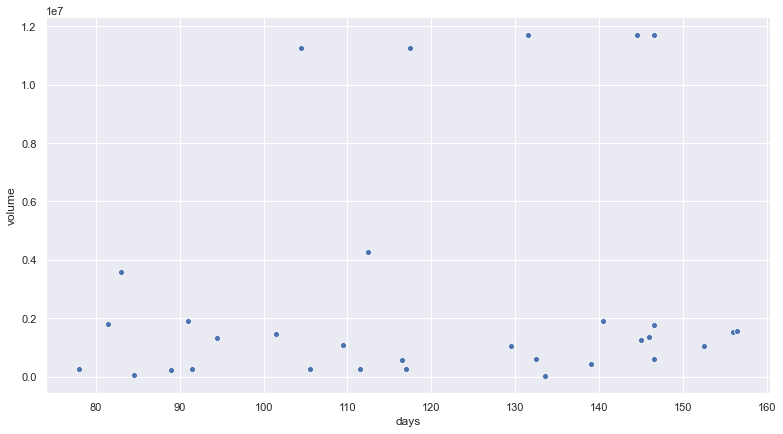

In [43]:
sns.pairplot(t1[t1['side']=='B'], x_vars=['days'], y_vars=['volume'], height = 4)
fig=plt.gcf()
fig.set_size_inches(12,6)

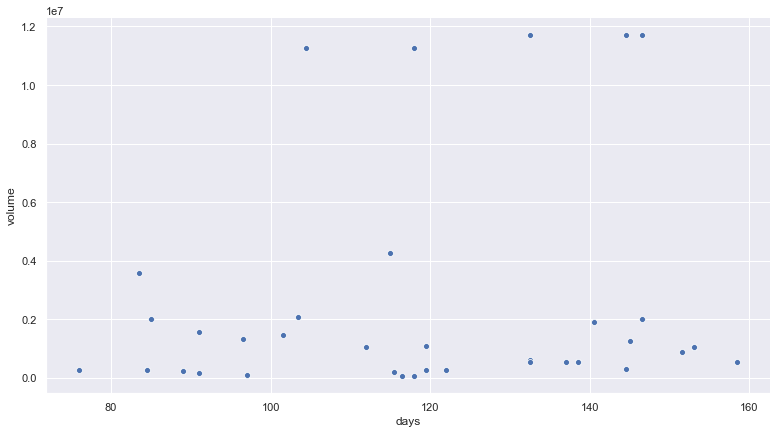

In [44]:
sns.pairplot(t1[t1['side']=='S'], x_vars=['days'], y_vars=['volume'], height = 4)
fig=plt.gcf()
fig.set_size_inches(12,6)

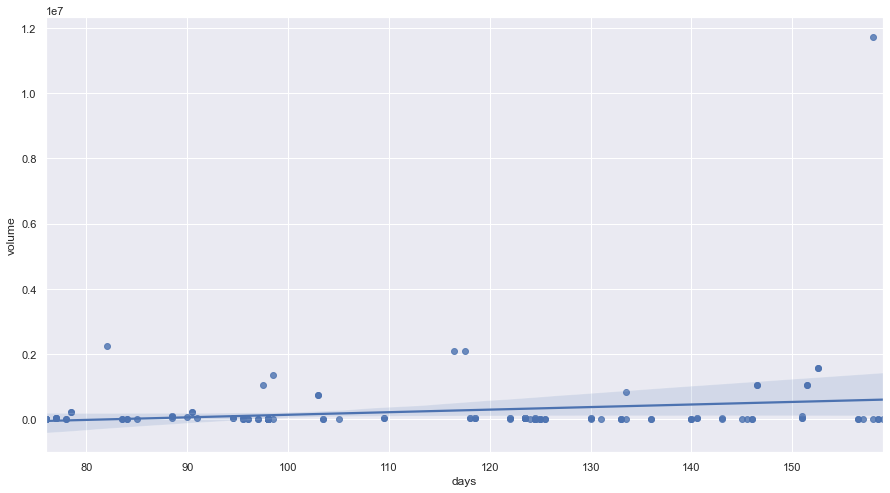

In [45]:
fig=plt.gcf()
fig.set_size_inches(15,8)
t1 = data[data['isin'] == 'isin8405'].sort_values('days')
a_plot=sns.regplot(x='days', y='volume', data=t1[t1['side']=='B'])

* Buying Selling Volume By Session Of The Day

In [46]:
sns.set()

In [47]:
def bondSessionVol(bondnm,sid):
    data[ (data['isin']==bondnm) & (data['side']==sid) ].groupby("timeofday")["volume"].sum().plot.pie(autopct="%.2f%%")
    fig=plt.gcf()
    fig.set_size_inches(12,6)

In [48]:
from ipywidgets import interact
_ = interact(bondSessionVol, bondnm=data['isin'].unique(), sid=['B', 'S'] )


interactive(children=(Dropdown(description='bondnm', options=('isin10033', 'isin100', 'isin10272', 'isin10023'…

#### Trend In Bond's Prices

In [49]:
def bondpricebuysell(bondnm):
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    df_ts_price=data[ (data['isin']==bondnm)]
    df_ts_price['prop_time']=pd.to_datetime(df_ts_price['time'], infer_datetime_format=True) 
    df_ts_price=df_ts_price.sort_values('prop_time')
    sns.lineplot(data=df_ts_price, x="prop_time", y="price", hue='side')

In [50]:
from ipywidgets import interact
_ = interact(bondpricebuysell, bondnm=data['isin'].unique())


interactive(children=(Dropdown(description='bondnm', options=('isin10033', 'isin100', 'isin10272', 'isin10023'…

#### Trend In Bond's Volume

In [51]:
def bondvolts(bondnm):
    fig=plt.gcf()
    fig.set_size_inches(15,8)
    df_ts_vol=data[ (data['isin']==bondnm)]
    df_ts_vol['prop_time']=pd.to_datetime(df_ts_vol['time'], infer_datetime_format=True) 
    df_ts_vol=df_ts_vol.sort_values('prop_time')
    sns.lineplot(data=df_ts_vol, x="prop_time", y="volume", hue='side')

In [52]:
from ipywidgets import interact
_ = interact(bondvolts, bondnm=data['isin'].unique())

interactive(children=(Dropdown(description='bondnm', options=('isin10033', 'isin100', 'isin10272', 'isin10023'…

#### Top 5 Bonds Bought

In [56]:
 df_top_buy_vol=data[data['side']=='B'].groupby("isin")["volume"].sum().nlargest(5)

In [57]:
df_top_buy_vol.astype('float64')

isin
isin11320    3.122680e+09
isin11321    2.457575e+09
isin984      2.120365e+09
isin4797     1.985610e+09
isin10883    1.605620e+09
Name: volume, dtype: float64

In [58]:
df_top_buy_vol.index.values

array(['isin11320', 'isin11321', 'isin984', 'isin4797', 'isin10883'],
      dtype=object)

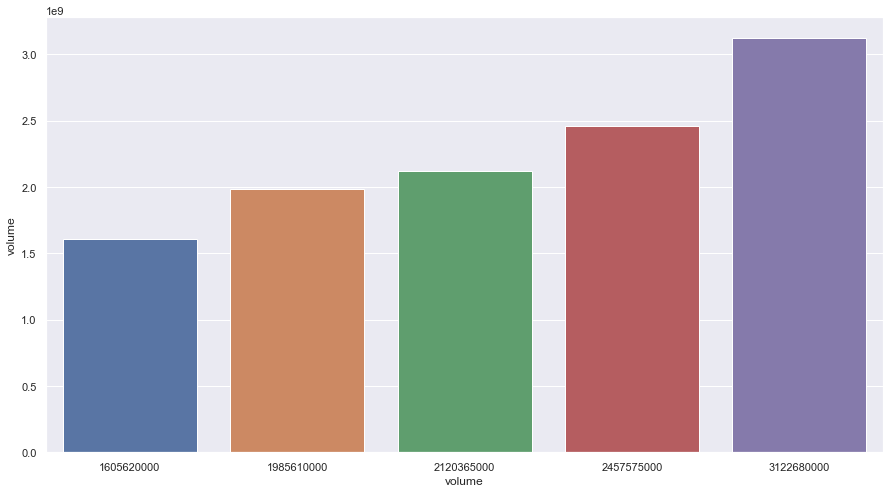

In [84]:
fig=plt.gcf()
fig.set_size_inches(15,8)
sns.barplot(x=df_top_buy_vol.index.values, y=df_top_buy_vol, data=df_top_buy_vol)

#### Top 5 Bonds Sold

In [60]:
 df_top_sell_vol=data[data['side']=='S'].groupby("isin")["volume"].sum().nlargest(5)

In [61]:
df_top_sell_vol.index.values

array(['isin11320', 'isin11321', 'isin984', 'isin4797', 'isin983'],
      dtype=object)

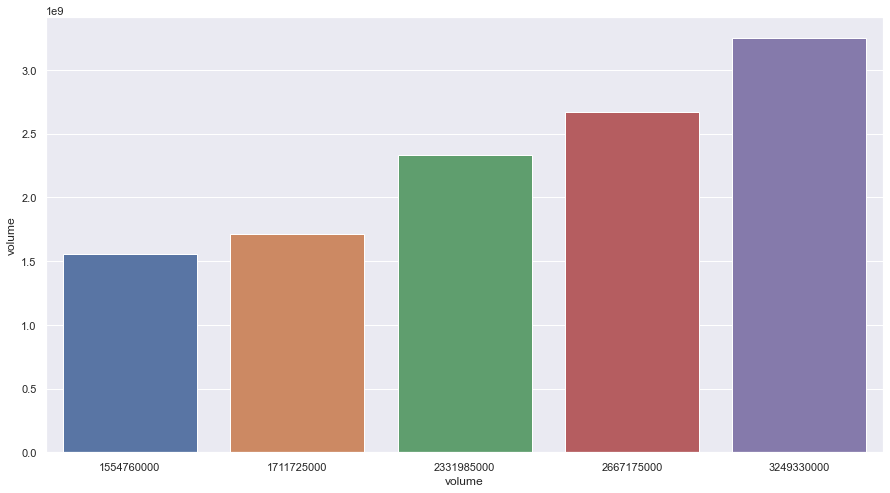

In [85]:
fig=plt.gcf()
fig.set_size_inches(15,8)
sns.barplot(x=df_top_sell_vol.index.values, y=df_top_sell_vol, data=df_top_sell_vol)